Facteur de redimensionnement : 1, Temps d'exécution : 0.118032 secondes


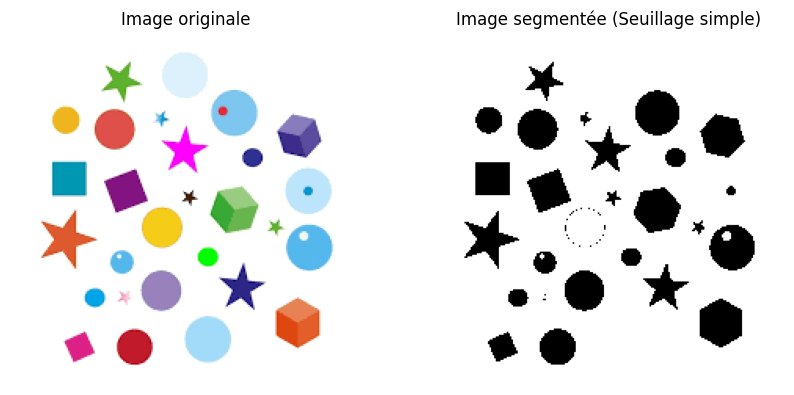

Facteur de redimensionnement : 3, Temps d'exécution : 1.063929 secondes
Facteur de redimensionnement : 5, Temps d'exécution : 3.012486 secondes
Facteur de redimensionnement : 7, Temps d'exécution : 5.765212 secondes
Facteur de redimensionnement : 9, Temps d'exécution : 9.571019 secondes
Facteur de redimensionnement : 11, Temps d'exécution : 14.287436 secondes
Facteur de redimensionnement : 13, Temps d'exécution : 20.150966 secondes


In [1]:
import cv2
import time
import matplotlib.pyplot as plt

def threshold_simple(image, threshold):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    result_image = gray.copy()
    height, width = gray.shape
    for i in range(height):
        for j in range(width):
            result_image[i, j] = 0 if gray[i, j] < threshold else 255
    return result_image

def measure_execution_times(image_path, resize_factors, output_file):
    original_image = cv2.imread(image_path)
    if original_image is None:
        print("Erreur : Impossible de charger l'image.")
        return

    results = []
    for factor in resize_factors:
        # Redimensionner l'image
        resized_image = cv2.resize(
            original_image, 
            (original_image.shape[1] * factor, original_image.shape[0] * factor)
        )
        start_time = time.time()
        result_image = threshold_simple(resized_image, 188)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((factor, execution_time))
        print(f"Facteur de redimensionnement : {factor}, Temps d'exécution : {execution_time:.6f} secondes")
        
        if factor == 1:
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title("Image originale")
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.subplot(1, 2, 2)
            plt.title("Image segmentée (Seuillage simple)")
            plt.imshow(result_image, cmap="gray")
            plt.axis("off")
            plt.show()

    # Sauvegarder les résultats dans un fichier
    with open(output_file, "w") as file:
        for factor, exec_time in results:
            file.write(f"Facteur de redimensionnement : {factor}, Temps d'exécution : {exec_time:.6f} secondes\n")

# Exemple d'utilisation
if __name__ == "__main__":
    image_path = "../../images.png"  
    resize_factors = [1, 3, 5, 7, 9, 11]  
    output_file = "execution_times_simple.rtf"  
    measure_execution_times(image_path, resize_factors, output_file)
